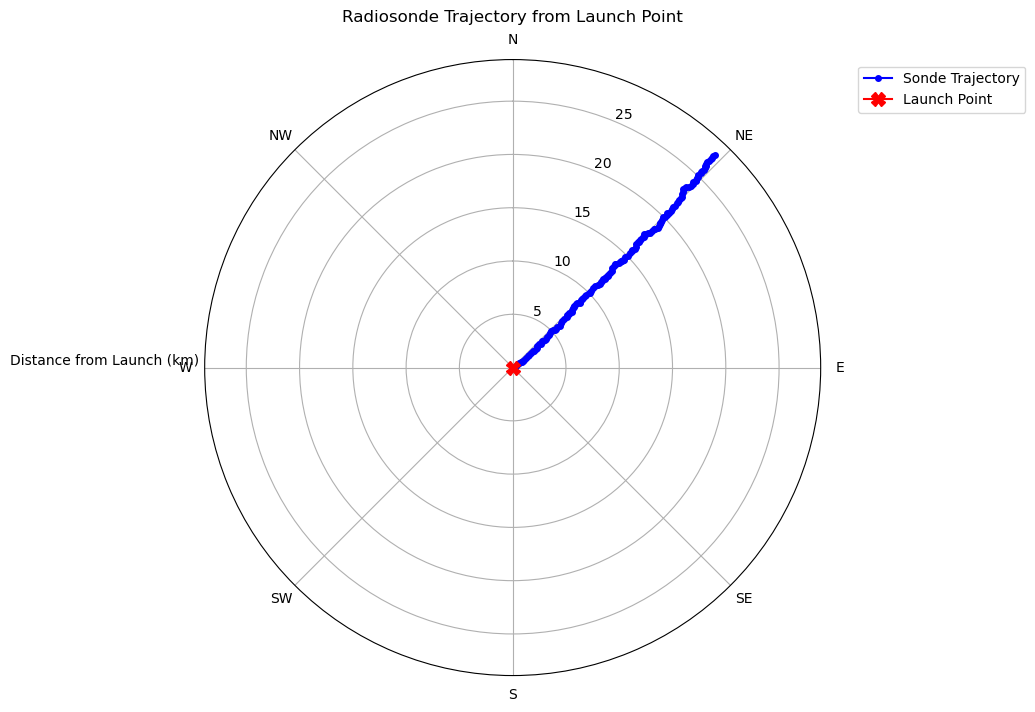

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from math import radians, degrees, sin, cos, atan2, sqrt

def haversine_distance(lat1, lon1, lat2, lon2):
    """
    Calculate the great-circle distance between two points on Earth
    (specified in decimal degrees) using the Haversine formula.
    Returns distance in kilometers.
    """
    R = 6371  # Radius of Earth in kilometers

    lat1_rad = radians(lat1)
    lon1_rad = radians(lon1)
    lat2_rad = radians(lat2)
    lon2_rad = radians(lon2)

    dlon = lon2_rad - lon1_rad
    dlat = lat2_rad - lat1_rad

    a = sin(dlat / 2)**2 + cos(lat1_rad) * cos(lat2_rad) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance

def calculate_bearing(lat1, lon1, lat2, lon2):
    """
    Calculate the bearing (direction) from point 1 to point 2.
    Returns bearing in degrees (0-360, North=0, East=90, South=180, West=270).
    """
    lat1_rad = radians(lat1)
    lon1_rad = radians(lon1)
    lat2_rad = radians(lat2)
    lon2_rad = radians(lon2)

    dlon = lon2_rad - lon1_rad

    y = sin(dlon) * cos(lat2_rad)
    x = cos(lat1_rad) * sin(lat2_rad) - sin(lat1_rad) * cos(lat2_rad) * cos(dlon)

    bearing_rad = atan2(y, x)
    bearing_deg = degrees(bearing_rad)
    bearing_deg = (bearing_deg + 360) % 360  # Normalize to 0-360 degrees

    return bearing_deg

def generate_dummy_radiosonde_data(
    launch_lat=17.3850, launch_lon=78.4867, # Hyderabad, India
    num_points=100,
    avg_speed_km_per_point=0.1, # Average distance covered per simulated point
    wind_direction_deg=45, # General wind direction (NE)
    random_variation_factor=0.05
):
    """
    Generates dummy latitude and longitude data for a radiosonde trajectory.
    Simulates movement from a launch point with a general wind direction and some randomness.

    Args:
        launch_lat (float): Launch latitude.
        launch_lon (float): Launch longitude.
        num_points (int): Number of GPS points to simulate.
        avg_speed_km_per_point (float): Average distance the sonde moves per point (in km).
        wind_direction_deg (float): General direction of wind in degrees (0-360).
        random_variation_factor (float): Factor for random deviation from wind direction.

    Returns:
        list: A list of (latitude, longitude) tuples.
    """
    trajectory = [(launch_lat, launch_lon)]
    current_lat, current_lon = launch_lat, launch_lon

    for _ in range(num_points - 1):
        # Simulate movement based on wind direction and some randomness
        angle_rad = radians(wind_direction_deg + np.random.uniform(-random_variation_factor, random_variation_factor) * 360)
        distance_km = avg_speed_km_per_point * (1 + np.random.uniform(-0.5, 0.5)) # Vary speed slightly

        # Convert distance and bearing to delta lat/lon (approximate for small distances)
        # 1 degree of latitude is approximately 111 km
        # 1 degree of longitude is approximately 111 * cos(latitude) km
        delta_lat = (distance_km * cos(angle_rad)) / 111.0
        delta_lon = (distance_km * sin(angle_rad)) / (111.0 * cos(radians(current_lat)))

        current_lat += delta_lat
        current_lon += delta_lon
        trajectory.append((current_lat, current_lon))

    return trajectory

def plot_radiosonde_trajectory(trajectory_data, launch_lat, launch_lon):
    """
    Plots the radiosonde trajectory on a polar plot.

    Args:
        trajectory_data (list): List of (latitude, longitude) tuples.
        launch_lat (float): Latitude of the launch point.
        launch_lon (float): Longitude of the launch point.
    """
    distances = []
    bearings_rad = []

    # Calculate distances and bearings relative to the launch point
    for i, (lat, lon) in enumerate(trajectory_data):
        if i == 0: # Launch point
            distances.append(0)
            bearings_rad.append(0) # Arbitrary for origin
        else:
            dist = haversine_distance(launch_lat, launch_lon, lat, lon)
            bearing = calculate_bearing(launch_lat, launch_lon, lat, lon)
            distances.append(dist)
            bearings_rad.append(radians(bearing))

    # --- Create the Polar Plot ---
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})

    # Plot the trajectory
    ax.plot(bearings_rad, distances, marker='o', markersize=4, linestyle='-', color='blue', label='Sonde Trajectory')

    # Mark the launch point
    ax.plot(0, 0, marker='X', markersize=10, color='red', label='Launch Point', zorder=5)

    # Set 0 degrees to North and direction clockwise
    ax.set_theta_zero_location('N')
    ax.set_theta_direction(-1) # Clockwise direction

    # Set radial ticks and labels
    ax.set_rlabel_position(22.5)  # Position of the radial labels (distance)
    ax.set_ylabel('Distance from Launch (km)', rotation=0, ha='right') # Label for radial axis

    # Set angular ticks and labels (compass directions)
    ax.set_xticks(np.linspace(0, 2*np.pi, 8, endpoint=False))
    ax.set_xticklabels(['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW'])

    ax.set_title('Radiosonde Trajectory from Launch Point', va='bottom')
    ax.grid(True)
    ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1)) # Place legend outside plot

    plt.show()

if __name__ == "__main__":
    # Define launch coordinates (example: Hyderabad, India)
    launch_lat = 17.3850
    launch_lon = 78.4867

    # Generate dummy data for the radiosonde's path
    # Simulates a balloon moving generally towards the Northeast (45 degrees)
    dummy_trajectory = generate_dummy_radiosonde_data(
        launch_lat=launch_lat,
        launch_lon=launch_lon,
        num_points=150, # More points for a smoother curve
        avg_speed_km_per_point=0.2, # Moves a bit faster
        wind_direction_deg=45, # Northeast
        random_variation_factor=0.1 # More random wiggles
    )

    # Plot the trajectory
    plot_radiosonde_trajectory(dummy_trajectory, launch_lat, launch_lon)